In [1]:
import numpy as np
from matplotlib import markers
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader
from dataset import BraggNNDataset
import numpy as np
from torchsummary import summary
import random as rm

In [2]:
from model import BraggNN_MLP, BraggNN

In [3]:
# load a pre-trained model 
model  = BraggNN_MLP(fcsz=[200]) # should use the same argu as it in the training.
mdl_fn = 'final.pth'
model.load_state_dict(torch.load(mdl_fn, map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
# load a pre-trained model 
model_org  = BraggNN(imgsz=11, fcsz=(16, 8, 4, 2)) # should use the same argu as it in the training.
mdl_fn = 'models/fc16_8_4_2-sz11.pth'
model_org.load_state_dict(torch.load(mdl_fn, map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
#load the data for braggNN
def load_data():
    ds_train = BraggNNDataset(psz=11, rnd_shift=1, use='train')
    dl_train = DataLoader(dataset=ds_train, batch_size=1, shuffle=True,\
                          num_workers=8, prefetch_factor=1, drop_last=True, pin_memory=True)

    ds_valid = BraggNNDataset(psz=11, rnd_shift=0, use='validation')
    dl_valid = DataLoader(dataset=ds_valid, batch_size=1, shuffle=False, \
                      num_workers=8, prefetch_factor=1, drop_last=False, pin_memory=True)

    return dl_train, dl_valid

def load_data_large():
    s_train = BraggNNDataset(psz=23, rnd_shift=1, use='train')
    l_train = DataLoader(dataset=s_train, batch_size=1, shuffle=True,\
                          num_workers=8, prefetch_factor=1, drop_last=True, pin_memory=True)

    s_valid = BraggNNDataset(psz=23, rnd_shift=0, use='validation')
    l_valid = DataLoader(dataset=s_valid, batch_size=1, shuffle=False, \
                      num_workers=8, prefetch_factor=1, drop_last=False, pin_memory=True)

    return l_train, l_valid

In [6]:
dl_train, dl_valid = load_data()
#l_train, l_valid = load_data_large()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pred_val = []
gt_val = []
y_val = []
x_val = []

count = 6
for X_mb_val, y_mb_val in dl_valid:
    with torch.no_grad():
        if count > 0:
            _pred = model.forward(X_mb_val.to(device))
            pred_val.append(_pred.cpu().numpy())
            gt_val.append(y_mb_val.numpy())
            x_val.append(X_mb_val)
            y_val.append(y_mb_val)
            count = count-1

pred_val = np.concatenate(pred_val, axis=0)
gt_val = np.concatenate(gt_val,   axis=0)
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val,   axis=0)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pred_v = []
gt_v = []
y_v = []
x_v = []

count = 6
for X_mb_val, y_mb_val in dl_valid:
    with torch.no_grad():
        if count > 0:
            _pred = model_org.forward(X_mb_val.to(device))
            pred_v.append(_pred.cpu().numpy())
            gt_v.append(y_mb_val.numpy())
            x_v.append(X_mb_val)
            y_v.append(y_mb_val)
            count = count-1

pred_v = np.concatenate(pred_v, axis=0)
gt_v = np.concatenate(gt_v,   axis=0)
x_v = np.concatenate(x_v, axis=0)
y_v = np.concatenate(y_v,   axis=0)

[[0.45189825 0.54617083]
 [0.54338604 0.5276473 ]
 [0.469887   0.4706816 ]
 [0.5378106  0.46063843]
 [0.4602644  0.54466224]
 [0.5669163  0.5048448 ]]


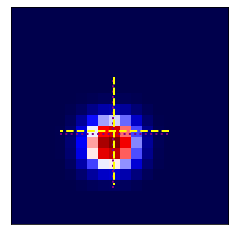

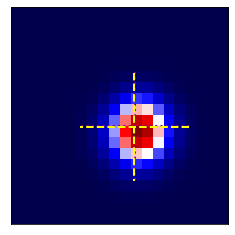

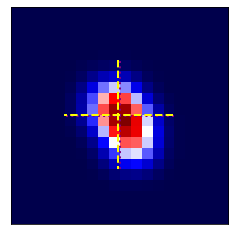

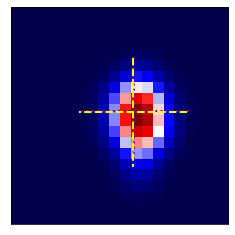

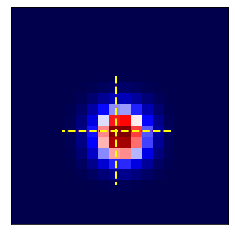

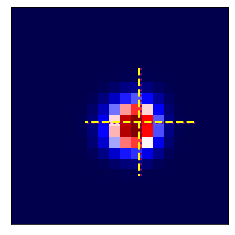

In [17]:
from scipy.ndimage import gaussian_filter
from skimage import transform
#fig, axs = plt.subplots(2, sharex=True, sharey=True)
print(pred_v)
count = 6
mult = 20
for i in range(count):
    #img = transform.rescale(x_val[i,0,:], 5)
    plt.figure()
    img = transform.resize(x_val[i,0,:], (mult, mult))
    img = gaussian_filter(img, sigma=1, order=0)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='seismic')
    #plt.plot(pred_val[i], marker='+')
    #plt.plot(pred_val[i][0]*55, pred_val[i][1]*55, marker='+', color='white')
    plt.vlines(x=pred_val[i][0]*mult, ymin=(pred_val[i][1]*mult)-5, ymax=(pred_val[i][1]*mult)+5, color='purple',linestyle = ':',linewidth = 2)
    plt.hlines(xmin=pred_val[i][0]*mult+5, xmax=(pred_val[i][0]*mult)-5, y=pred_val[i][1]*mult, color='purple',linestyle = ':',linewidth = 2)
    plt.vlines(x=pred_v[i][0]*mult, ymin=(pred_v[i][1]*mult)-5, ymax=(pred_v[i][1]*mult)+5, color='yellow',linestyle = '--',linewidth = 2)
    plt.hlines(xmin=pred_v[i][0]*mult+5, xmax=(pred_v[i][0]*mult)-5, y=pred_v[i][1]*mult, color='yellow',linestyle = '--',linewidth = 2)
    plt.savefig("./model_output/pdf/test"+str(i)+".pdf", dpi=200)

#plt.imshow(X_val, cmap='seismic')
plt.show(); 
#plt.savefig("test.jpg")
plt.close()

In [ ]:
print(pred_val)

In [ ]:
input_tensor = torch.from_numpy(X_test[np.newaxis, np.newaxis].astype('float32'))
with torch.no_grad():
    pred = model.forward(input_tensor).cpu().numpy()

In [ ]:
# scale back peak location by multiply with patch size
pred * 11